In [2]:
library(WGCNA)
options(stringsAsFactors = FALSE)

In [6]:
lnames = load(file = "Consensus-dataInput.RData")
lnames

[1] "multiExpr"   "Traits"      "nGenes"      "nSamples"    "setLabels"  
[6] "shortLabels" "exprSize"

In [9]:
nSets = checkSets(multiExpr)$nSets # 2

# Network construction and module detection

## Choosing the soft-thresholding power:  analysis of network topology

pickSoftThreshold: will use block size 3600.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3600 of 3600


Warning message:
"executing %dopar% sequentially: no parallel backend registered"

   Power SFT.R.sq slope truncated.R.sq mean.k. median.k. max.k.
1      4    0.506 -1.42          0.973   56.50   47.2000  202.0
2      5    0.681 -1.72          0.940   32.20   25.1000  134.0
3      6    0.902 -1.50          0.962   19.90   14.5000   94.8
4      7    0.921 -1.67          0.917   13.20    8.6800   84.1
5      8    0.904 -1.72          0.876    9.25    5.3900   76.3
6      9    0.859 -1.70          0.836    6.80    3.5600   70.5
7     10    0.833 -1.66          0.831    5.19    2.3800   65.8
8     12    0.853 -1.48          0.911    3.33    1.1500   58.1
9     14    0.876 -1.38          0.949    2.35    0.5740   51.9
10    16    0.907 -1.30          0.970    1.77    0.3090   46.8
11    18    0.912 -1.24          0.973    1.39    0.1670   42.5
12    20    0.931 -1.21          0.977    1.14    0.0951   38.7
pickSoftThreshold: will use block size 3600.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3600 of 3600
   Power SFT.

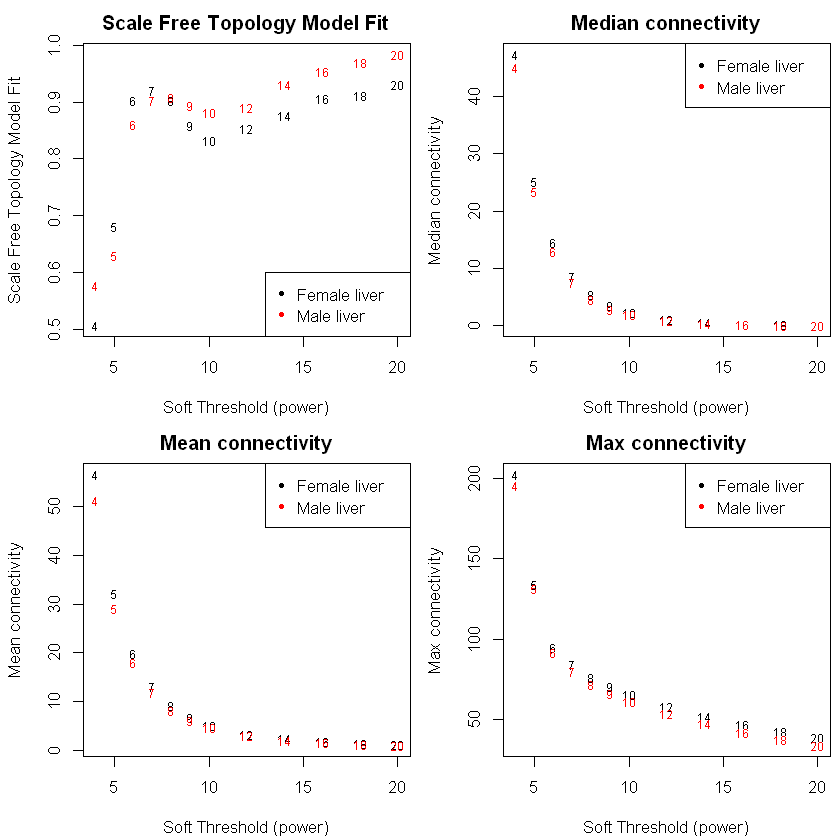

In [13]:
# Choose a set of soft-thresholding powers
powers = c(seq(4,10,by=1), seq(12,20, by=2))
# Initialize a list to hold the results of scale-free analysis
powerTables = vector(mode = "list", length = nSets);
# Call the network topology analysis function for each set in turn
for (set in 1:nSets){
    powerTables[[set]] = list(data = pickSoftThreshold(multiExpr[[set]]$data, 
                                    powerVector=powers,verbose = 2)[[2]])
}
collectGarbage()

colors = c("black", "red")
# Will plot these columns of the returned scale free analysis tables
plotCols = c(2,5,6,7)
colNames = c("Scale Free Topology Model Fit", "Mean connectivity", 
             "Median connectivity","Max connectivity")

# Get the minima and maxima of the plotted points used for plotting
ylim = matrix(NA, nrow = 2, ncol = 4)
for (set in 1:nSets){
    for (col in 1:length(plotCols)){
        ylim[1, col] = min(ylim[1, col], 
                           powerTables[[set]]$data[, plotCols[col]], na.rm = TRUE)
        ylim[2, col] = max(ylim[2, col], 
                           powerTables[[set]]$data[, plotCols[col]], na.rm = TRUE)
    }
}

# Plot the quantities in the chosen columns vs. the soft thresholding power
par(mfcol = c(2,2))
par(mar = c(4.2, 4.2 , 2.2, 0.5))
cex1 = 0.7

for (col in 1:length(plotCols)) {
    for (set in 1:nSets){
        if (set==1){
            plot(powerTables[[set]]$data[,1], 
                 -sign(powerTables[[set]]$data[,3])*powerTables[[set]]$data[,2],
                 xlab="Soft Threshold (power)",ylab=colNames[col],type="n", 
                 ylim = ylim[, col],main = colNames[col])
        }
        if (col==1){
            text(powerTables[[set]]$data[,1], 
                 -sign(powerTables[[set]]$data[,3])*powerTables[[set]]$data[,2],
                 labels=powers,cex=cex1,col=colors[set])
        }else {
            text(powerTables[[set]]$data[,1], 
                 powerTables[[set]]$data[,plotCols[col]],
                 labels=powers,cex=cex1,col=colors[set])
        }
        if (col==1){
            legend("bottomright", legend = setLabels, col = colors, pch = 20)
        }else{
            legend("topright", legend = setLabels, col = colors, pch = 20) 
        }
        
    }
}

## Calculation of network adjacencies

In [24]:
softPower = 6;
# Initialize an appropriate array to hold the adjacencies
adjacencies = array(0, dim = c(nSets, nGenes, nGenes));
for (set in 1:nSets)
    adjacencies[set, , ] = abs(cor(multiExpr[[set]]$data, use = "p"))^softPower

## Calculation of Topological Overlap

In [25]:
# Initialize an appropriate array to hold the TOMs
TOM = array(0, dim = c(nSets, nGenes, nGenes))
# Calculate TOMs in each individual data set
for (set in 1:nSets)
    TOM[set, , ] = TOMsimilarity(adjacencies[set, , ])

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
